In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df = pd.read_csv('result.csv')

In [5]:
df.head()

,start_date,start_time,distance,distance_raw,short_unit,moving_time,elapsed_time
0,"Wed, 19/06/2019",2019-06-19T12:29:10+0000,2.42,2423.1,km,10:01,10:01
1,"Sun, 23/06/2019",2019-06-23T00:04:04+0000,4.00,4002.4,km,18:10,18:19
2,"Mon, 24/06/2019",2019-06-24T00:55:33+0000,3.99,3992.5,km,19:54,19:54
3,"Sun, 30/06/2019",2019-06-30T01:34:17+0000,3.99,3994.8,km,18:19,18:19
4,"Tue, 09/07/2019",2019-07-09T12:31:03+0000,3.88,3880.1,km,20:05,20:34


In [6]:
def splitT(x):
    return x.split('T')[0]
df['start_time'] = df['start_time'].apply(splitT)

In [7]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [11]:
def year(x):
    return x.year
df['Year'] = df['start_time'].apply(year)
def mth(x):
    dmap = {1:'/01',2:'/02',3:'/03',4:'/04',5:'/05',6:'/06',7:'/07',8:'/08',9:'/09',10:'/10',11:'/11',12:'/12'}
    return dmap[x.month]
df['Month'] = df['start_time'].apply(mth)

In [13]:
df.head()

,start_date,start_time,distance,distance_raw,short_unit,moving_time,elapsed_time,Year,Month
0,"Wed, 19/06/2019",2019-06-19,2.42,2423.1,km,10:01,10:01,2019,/06
1,"Sun, 23/06/2019",2019-06-23,4.00,4002.4,km,18:10,18:19,2019,/06
2,"Mon, 24/06/2019",2019-06-24,3.99,3992.5,km,19:54,19:54,2019,/06
3,"Sun, 30/06/2019",2019-06-30,3.99,3994.8,km,18:19,18:19,2019,/06
4,"Tue, 09/07/2019",2019-07-09,3.88,3880.1,km,20:05,20:34,2019,/07


In [15]:
df['MY'] = df['Year'].map(str) + df['Month']

In [22]:
df.head()
plt.style.use('ggplot')

In [23]:
pivotMYDistance = df.pivot_table(aggfunc= 'sum', values='distance', index=['MY'])

NameError: name 'y' is not defined

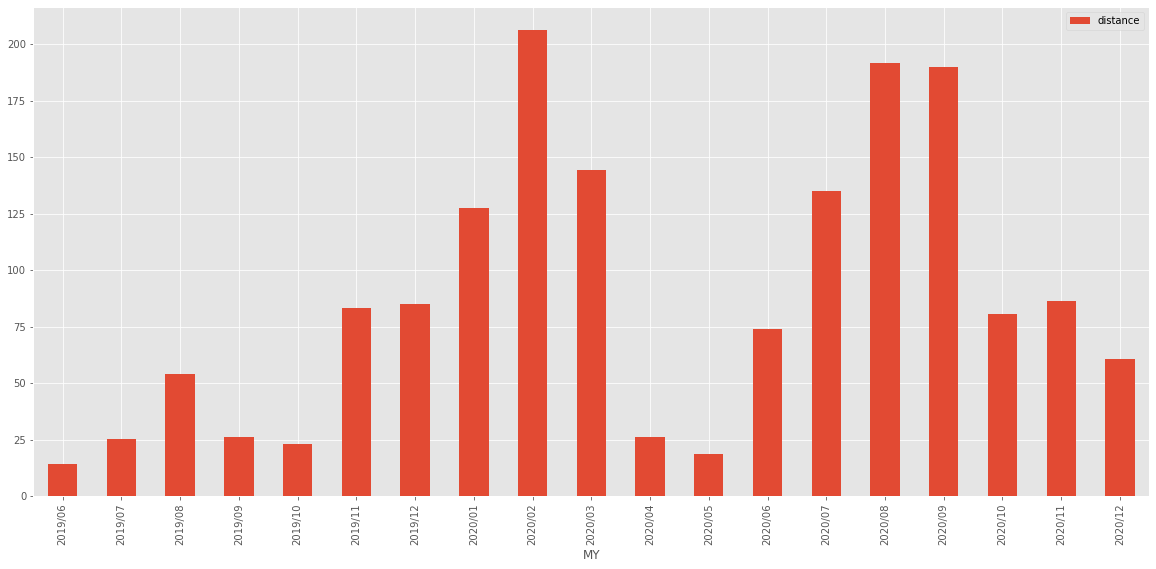

In [54]:
pivotMYDistance.plot.bar(figsize=(20,9))

In [25]:
pivotMYDistance.iplot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

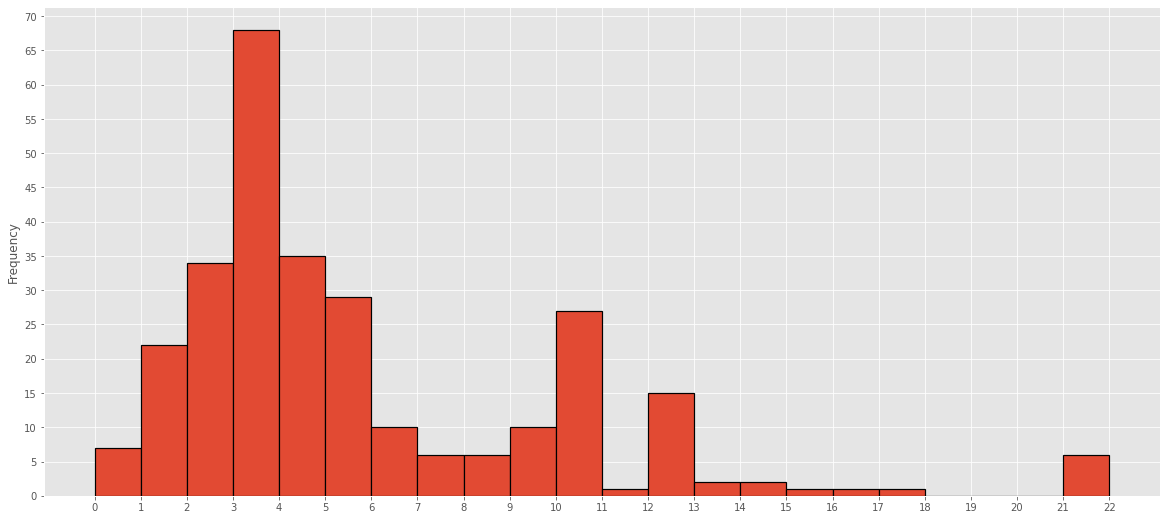

In [56]:
xtick=np.arange(0,23)
ytick=np.arange(0,75,5)
df['distance'].plot.hist(edgecolor='black', linewidth=1.2, figsize=(20,9), bins=xtick, xticks=xtick, yticks=ytick)

In [90]:
plt.style.use('ggplot')
df['distance'].iplot(kind='hist', bins=25, theme='pearl', title='2019-2020 Runs', xTitle="Distance/km", yTitle="Frequency")

In [81]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [92]:
df['distance'].max()

22.14